# Braiding Phase $\varphi_{br}$ by depletion profile

In [13]:
using Primes
n_phi = 17
for qq in 1:10
    println("q=$(qq)")
    f = factor(qq*n_phi)
    divisors = Iterators.map(x->prod(map(y->y[1]^(y[2]-1),zip(tuple(keys(f)...),Tuple(x)))),CartesianIndices(tuple((values(f).+1)...)))
    for d in divisors
        println("$(d) * $(prod(f)÷d) = $(prod(f))")
    end
    println("----")
end

q=1
1 * 17 = 17
17 * 1 = 17
----
q=2
1 * 34 = 34
2 * 17 = 34
17 * 2 = 34
34 * 1 = 34
----
q=3
1 * 51 = 51
3 * 17 = 51
17 * 3 = 51
51 * 1 = 51
----
q=4
1 * 68 = 68
2 * 34 = 68
4 * 17 = 68
17 * 4 = 68
34 * 2 = 68
68 * 1 = 68
----
q=5
1 * 85 = 85
5 * 17 = 85
17 * 5 = 85
85 * 1 = 85
----
q=6
1 * 102 = 102
2 * 51 = 102
3 * 34 = 102
6 * 17 = 102
17 * 6 = 102
34 * 3 = 102
51 * 2 = 102
102 * 1 = 102
----
q=7
1 * 119 = 119
7 * 17 = 119
17 * 7 = 119
119 * 1 = 119
----
q=8
1 * 136 = 136
2 * 68 = 136
4 * 34 = 136
8 * 17 = 136
17 * 8 = 136
34 * 4 = 136
68 * 2 = 136
136 * 1 = 136
----
q=9
1 * 153 = 153
3 * 51 = 153
9 * 17 = 153
17 * 9 = 153
51 * 3 = 153
153 * 1 = 153
----
q=10
1 * 170 = 170
2 * 85 = 170
5 * 34 = 170
10 * 17 = 170
17 * 10 = 170
34 * 5 = 170
85 * 2 = 170
170 * 1 = 170
----


https://arxiv.org/pdf/1910.05222.pdf (Section B. Lattice generalization)

# With two methods (Masking and List)

In [1]:
using NBInclude
using Plots
using LaTeXStrings
using SparseArrays
using DataFrames
using Interpolations
using LinearAlgebra
using ProgressMeter
@nbinclude("Hofstadter Single Particle in Julia.ipynb")
@nbinclude("../First Band Approximation Functions.ipynb")
@nbinclude("../Hofstadter Many Body Utils.ipynb")
@nbinclude("../Braiding Utils.ipynb")
@nbinclude("Torus_Distance.ipynb")
@nbinclude("../Braiding_Phase_Depletion_Script.ipynb");

In [2]:

# nbexport("../Braid_Depletion_Truba_Julia_Files/Hofstadter_Single_Particle_in_Julia.jl", "Hofstadter Single Particle in Julia.ipynb")
# nbexport("../Braid_Depletion_Truba_Julia_Files/First_Band_Approximation_Functions.jl","../First Band Approximation Functions.ipynb")
# nbexport("../Braid_Depletion_Truba_Julia_Files/Hofstadter_Many_Body_Utils.jl","../Hofstadter Many Body Utils.ipynb")
# nbexport("../Braid_Depletion_Truba_Julia_Files/Braiding_Utils.jl","../Braiding Utils.ipynb")
# nbexport("../Braid_Depletion_Truba_Julia_Files/Torus_Distance.jl","Torus_Distance.ipynb")
# nbexport("../Braid_Depletion_Truba_Julia_Files/Braiding_Phase_Depletion_Script.jl","../Braiding_Phase_Depletion_Script.ipynb")



In [3]:
Nx=10
Ny=8
p=1
q=10
par_num = 3
U = 2
V_Strength = 4

N=Nx*Ny
NPhi = Int( Nx * Ny * (p/q) )
cut_off = NPhi
PN = [i for i in 1:par_num];

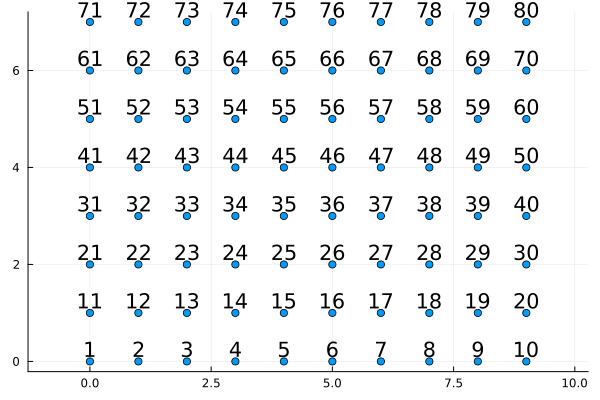

([0 0; 1 0; … ; 8 7; 9 7], nothing)

In [4]:
plot_square_lattice(Nx, Ny)

In [7]:
Coords = get_coords_square(Nx, Ny);

In [57]:
# row-column indexing
avg_density[8,1]

0.05233054285462717

In [56]:
# x-y indexing
site_idx = 8
i1 = Coords[site_idx][1]+1
            i2 = Coords[site_idx][2]+1
(i1,i2)

(8, 1)

In [9]:
x = 0.1
ref_site = 45
V0 = [V_Strength,x*V_Strength,x*V_Strength,x*V_Strength,x*V_Strength]
Imp_Site = [ref_site,ref_site-1,ref_site+1,ref_site+Nx,ref_site-Nx]
N_Pin = 2

2

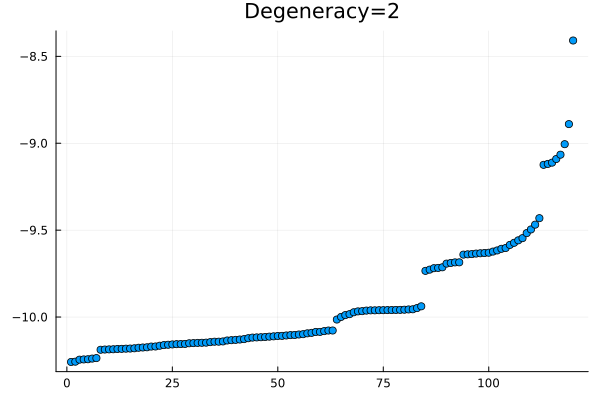

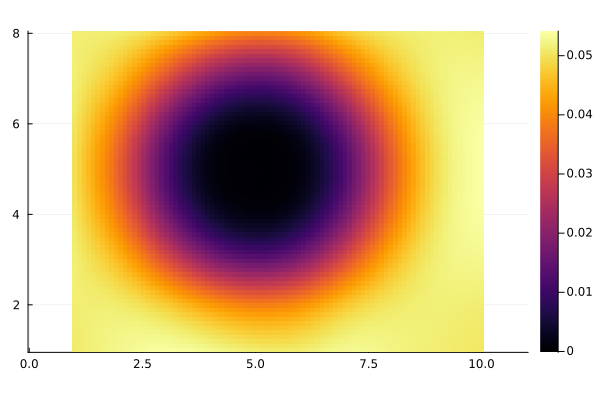

([-10.258469600513013, -10.256807298464992, -10.245255058076118, -10.243868705229216, -10.242805510594602, -10.239030687219984, -10.236121512053934, -10.188191824840345, -10.186954380578635, -10.18606093952827  …  -9.468346913206258, -9.431107608408816, -9.124156278545449, -9.118811629807851, -9.111595339602113, -9.090596930038297, -9.065835191751628, -9.005318855990781, -8.889798217477342, -8.408782296425825], 2, [0.05110284704656082 0.05144751572035472 … 0.05150849333986629 0.051447515720355025; 0.052819917399894376 0.05103463038508643 … 0.0452157196795738 0.051034630385087744; … ; 0.05142396133953104 0.05168544842283007 … 0.051603678272232556 0.051685448422833756; 0.050616639495044816 0.05133142068516979 … 0.05282289980069038 0.05133142068517252])

In [10]:
ϵ, Degeneracy, avg_density = impurity_control(V_Strength, V0, Imp_Site, N_Pin)

In [44]:
Nb =1
function braid_tensors(Nx, Ny, N, Nb, Coords, Density, ref_site, N_qh)
    dens_tensor = zeros(Nx,Ny,Nb)
    distance_list = []
    distance_tensor = zeros(Nx,Ny,Nb)
    if N_qh == 2
        for row in 1:(N-Nx)
            for column in 1:Ny
            # Becaus of row-column ≠ x-y 
            # i1 = Coords[site_idx][1]+1
            # i2 = Coords[site_idx][2]+1
            dens_tensor[row,column,Nb] = Density[row,column]
            push!(distance_list,distance_func(Coords, Coords[ref_site], Coords[site_idx]))
        end
        distance_list = reshape(distance_list,Nx,Ny)'
    else
        for site_idx in 1:N
            i1 = Coords[site_idx][1]+1
            i2 = Coords[site_idx][2]+1
            dens_tensor[i1,i2,Nb]=Density[i1,i2]
            push!(distance_list,distance_func(Coords, Coords[ref_site], Coords[site_idx]))
        end
        distance_list = reshape(distance_list,Nx,Ny)'
    end
    #distance_tensor[:,:,Nb] = distance_list
    return dens_tensor, distance_tensor
end

braid_tensors (generic function with 3 methods)

In [22]:
savefig(scatter(ϵ[1:5]),"First_4_energies_Npin_$(N_Pin).png")

"/home/can/Fractional_Statistics/Kagome-Lattice/My Numerical Calculations/Many-Body/Hofstadter/First_4_energies_Npin_2.png"

In [23]:
savefig(scatter(ϵ[1:Degeneracy+1]),"Zoom_In_Energies_Npin_$(N_Pin).png")

"/home/can/Fractional_Statistics/Kagome-Lattice/My Numerical Calculations/Many-Body/Hofstadter/Zoom_In_Energies_Npin_2.png"

In [24]:
ref_par_density_2_qh = get_ref_prtcl_density(par_num,p,q,NPhi,N_Pin)
println("Summation(2qh):",sum(ref_par_density_2_qh .- avg_density)) 

Summation(2qh):0.9999999999999988


In [25]:
filling_frac = par_num / (NPhi-N_Pin)
frac_charge = (filling_frac)*N_Pin
println("Charge(2qh):",frac_charge)

Charge(2qh):1.0


In [37]:
dens_2 = avg_density'[1:end-1,:] # Must Nx = q 
#dens_2.*(distance_array.<3)

7×10 Matrix{Float64}:
 0.0511028  0.0528199  0.0538239  …  0.0523305  0.051424   0.0506166
 0.0514475  0.0510346  0.0476487     0.0506675  0.0516854  0.0513314
 0.0515085  0.0452157  0.0323982     0.0450926  0.0516037  0.0528229
 0.0504893  0.0377103  0.0181199     0.037768   0.0505078  0.053913
 0.0496936  0.0342047  0.0128901     0.0343282  0.0497067  0.0541578
 0.0504893  0.0377103  0.0181199  …  0.037768   0.0505078  0.053913
 0.0515085  0.0452157  0.0323982     0.0450926  0.0516037  0.0528229

In [45]:
braid_tensors(Nx, Ny, N, Nb, Coords, dens_2, ref_site, 2)

LoadError: BoundsError: attempt to access 7×10 Matrix{Float64} at index [8, 1]

In [153]:
distance_array = []
for j in 1:N
    push!(distance_array,distance_func(Coords, Coords[ref_site], Coords[j]))
end
distance_array = reshape(distance_array,Nx,Ny)'

7×10 adjoint(::Matrix{Any}) with eltype Any:
 3.16228  3.0  3.16228  3.60555  …  5.83095  6.7082   7.61577  8.544
 2.23607  2.0  2.23607  2.82843     5.38516  6.32456  7.28011  8.24621
 1.41421  1.0  1.41421  2.23607     5.09902  6.08276  7.07107  8.06226
 1.0      0.0  1.0      2.0         5.0      6.0      7.0      8.0
 1.41421  1.0  1.41421  2.23607     5.09902  6.08276  7.07107  8.06226
 2.23607  2.0  2.23607  2.82843  …  5.38516  6.32456  7.28011  8.24621
 3.16228  3.0  3.16228  3.60555     5.83095  6.7082   7.61577  8.544

In [144]:
Ny=Ny-1 # change Ny to control flux otherwise reference site will shifted
N=Nx*Ny
NPhi = Int( Nx * Ny * (p/q) )
cut_off = NPhi

7

In [145]:
x = 0
V0 = [V_Strength,x*V_Strength,x*V_Strength,x*V_Strength,x*V_Strength]
N_Pin = 1

1

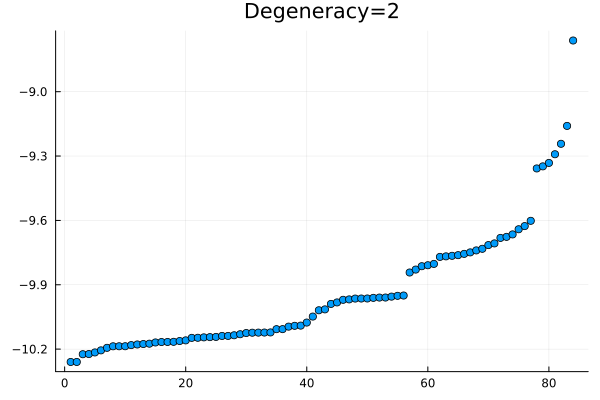

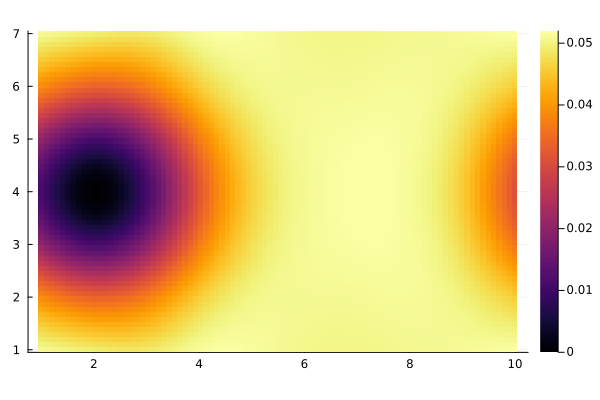

([-10.259834811773931, -10.259802068470984, -10.223747300781092, -10.222946159945444, -10.21542671738555, -10.20576634569055, -10.193921599862612, -10.186791572560562, -10.186655393989524, -10.186539806993775  …  -9.641283094736513, -9.626507951096936, -9.601949821440035, -9.357833038339146, -9.348144007391605, -9.332112956475521, -9.291621483787152, -9.242942086484865, -9.159583712632688, -8.761528216690783], 2, [0.05100559742979038 0.03867431821023948 … 0.03867431821023849 0.051005597429789995; 0.049230028210273946 0.03374080965254311 … 0.033740809652542794 0.04923002821027375; … ; 0.05113206809532839 0.04986936346784673 … 0.04986936346784498 0.051132068095327964; 0.051816404211251235 0.04582837078517542 … 0.045828370785173794 0.05181640421125085])

In [146]:
ϵ, Degeneracy, avg_density = impurity_control(V_Strength, V0, Imp_Site, N_Pin)

In [147]:
savefig(scatter(ϵ[1:5]),"First_4_energies_Npin_$(N_Pin).png")

"/home/can/Fractional_Statistics/Kagome-Lattice/My Numerical Calculations/Many-Body/Hofstadter/First_4_energies_Npin_1.png"

In [148]:
savefig(scatter(ϵ[1:Degeneracy+1]),"Zoom_In_Energies_Npin_$(N_Pin).png")

"/home/can/Fractional_Statistics/Kagome-Lattice/My Numerical Calculations/Many-Body/Hofstadter/Zoom_In_Energies_Npin_1.png"

In [149]:
ref_par_density_1_qh = get_ref_prtcl_density(par_num,p,q,NPhi,N_Pin)
println("Summation(1qh):",sum(ref_par_density .- avg_density)) 

LoadError: UndefVarError: `ref_par_density` not defined

In [150]:
filling_frac = par_num / (NPhi-N_Pin)
frac_charge = (filling_frac)*N_Pin
println("Charge(1qh):",frac_charge)

Charge(1qh):0.5


In [154]:
dens_1 = avg_density'
#dens_1.*(distance_array.<3)

7×10 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0510056  0.04923     0.0487234  …  0.0507946  0.0511321  0.0518164
 0.0386743  0.0337408   0.0369748     0.051229   0.0498694  0.0458284
 0.0204372  0.0112402   0.0194598     0.0514005  0.0473022  0.0364132
 0.0112076  8.27322e-7  0.0105386     0.0512767  0.045719   0.0314269
 0.0204372  0.0112402   0.0194598     0.0514005  0.0473022  0.0364132
 0.0386743  0.0337408   0.0369748  …  0.051229   0.0498694  0.0458284
 0.0510056  0.04923     0.0487234     0.0507946  0.0511321  0.0518164

In [155]:
# distance_array.<=R_max[19]

In [156]:
a = 1 # lattica constant
α = p/q # flux per plaquette
l_b = a/sqrt(2*pi*α)
braid_phase = []
braiding_density = ((1/2)/l_b^2)*(dens_2 .- 2*dens_1).*(distance_array.^2)
savefig(heatmap(dens_1),"dens_1_heatmap.png")
savefig(heatmap(dens_2),"dens_2_heatmap.png")
savefig(heatmap(braiding_density),"braiding_density_heatmap.png")
R_max = sort(unique(distance_array))
println(R_max)
for r in R_max
    push!(braid_phase, sum(braiding_density .* (distance_array.<=r)))
end
av_braiding = sum(mod.(braid_phase,1))/length(braid_phase)
plot(R_max,mod.(braid_phase,1),xlabel=L"R_{max}[l_b]", ylabel=L"\varphi_{br}[2\pi]" ,title=L"\frac{\varphi_{br}}{2\pi} = \frac{1}{2l_b^2} \sum_j \left[d_{2qh}-2d_{1qh} \right] |\rho_j|^2", label="$(av_braiding)",marker=(:circle,5))
x=0;g(x)=frac_charge
P = plot!(g, x, 7, label="$(filling_frac)")
savefig(P,"Braiding_Phase.png")

Any[0.0, 1.0, 1.4142135623730951, 2.0, 2.23606797749979, 2.8284271247461903, 3.0, 3.1622776601683795, 3.605551275463989, 4.0, 4.123105625617661, 4.242640687119285, 4.47213595499958, 5.0, 5.0990195135927845, 5.385164807134504, 5.830951894845301, 6.0, 6.082762530298219, 6.324555320336759, 6.708203932499369, 7.0, 7.0710678118654755, 7.280109889280518, 7.615773105863909, 8.0, 8.06225774829855, 8.246211251235321, 8.54400374531753]


"/home/can/Fractional_Statistics/Kagome-Lattice/My Numerical Calculations/Many-Body/Hofstadter/Braiding_Phase.png"

In [157]:
R_max

29-element Vector{Any}:
 0.0
 1.0
 1.4142135623730951
 2.0
 2.23606797749979
 2.8284271247461903
 3.0
 3.1622776601683795
 3.605551275463989
 4.0
 4.123105625617661
 4.242640687119285
 4.47213595499958
 ⋮
 6.0
 6.082762530298219
 6.324555320336759
 6.708203932499369
 7.0
 7.0710678118654755
 7.280109889280518
 7.615773105863909
 8.0
 8.06225774829855
 8.246211251235321
 8.54400374531753

In [158]:
n = 14
radius_list_1_qh[1:n] == radius_list_2_qh[1:n]
radius_list_1_qh[1:n]

14-element Vector{Any}:
 0.0
 1.0
 1.4142135623730951
 2.0
 2.23606797749979
 2.8284271247461903
 3.0
 3.1622776601683795
 3.605551275463989
 4.0
 4.123105625617661
 4.242640687119285
 4.47213595499958
 5.0

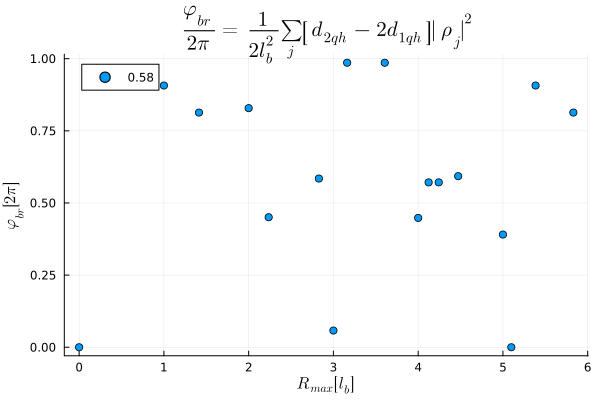

In [159]:
ϕ = (1/2*l_b^2) * (d_2_qh_list[1:n] .- 2*d_1_qh_list[1:n])
ϕ = mod.(ϕ, 1)
av_br = round(sum(ϕ)/length(ϕ),digits=2)
scatter([radius_list_1_qh],[ϕ], xlabel=L"R_{max}[l_b]", ylabel=L"\varphi_{br}[2\pi]" ,title=L"\frac{\varphi_{br}}{2\pi} = \frac{1}{2l_b^2} \sum_j \left[d_{2qh}-2d_{1qh} \right] |\rho_j|^2", label="$(av_br)")

In [160]:
minimum([dens_2...])
findmin([dens_2...])

(9.754560784459103e-8, 11)

In [161]:
findmin([dens_1...])

(8.273215002343621e-7, 11)

In [162]:
findmin([dens_1...])[2]

11

# Array Method

# 1 QH

In [269]:
@nbinclude("../Braiding_Phase_Depletion_Script.ipynb")

In [241]:
dens_1 == avg_density'

true

In [268]:
[avg_density'...][36]

0.06425855001574099

In [242]:
findmin(avg_density')

(2.2230688303053106e-6, CartesianIndex(5, 4))

In [243]:
avg_density'[5,4]

2.2230688303053106e-6

In [244]:
findmin([avg_density']...)

(2.2230688303053106e-6, CartesianIndex(5, 4))

In [245]:
avg_density'

7×8 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0636305  0.0648155  0.0644276  …  0.0642586  0.0637772  0.0629563
 0.0636305  0.0648155  0.0644276     0.0642586  0.0637772  0.0629563
 0.0641916  0.0606943  0.0519847     0.0602823  0.0642492  0.0644978
 0.0631271  0.0512718  0.0293527     0.0509788  0.0630764  0.0655811
 0.0616004  0.0450306  0.0162304     0.044773   0.0615041  0.0653978
 0.0631271  0.0512718  0.0293527  …  0.0509788  0.0630764  0.0655811
 0.0641916  0.0606943  0.0519847     0.0602823  0.0642492  0.0644978

In [246]:
Inner_Sites(2,ref_site,Coords)

13-element Vector{Any}:
 20
 27
 28
 29
 34
 35
 36
 37
 38
 43
 44
 45
 52

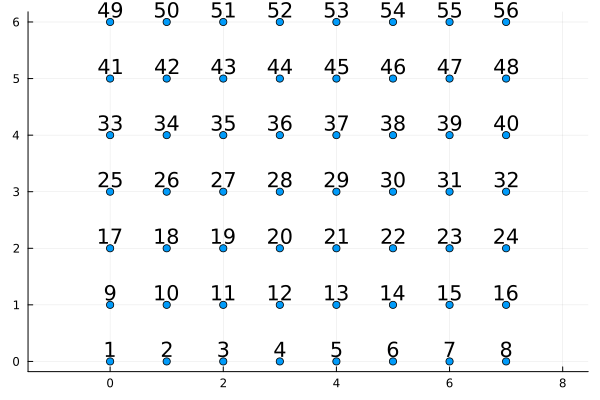

([0 0; 1 0; … ; 6 6; 7 6], nothing)

In [247]:
plot_square_lattice(Nx, Ny)

In [248]:
avg_density[4,5]

2.2230688303053106e-6

In [249]:
avg_density_func(j) = avg_density[(Coords[j].+1)...]

avg_density_func (generic function with 1 method)

In [250]:
Coords[36]

2-element Vector{Int64}:
 3
 4

In [251]:
avg_density_func(26)

0.05127184591007704

In [252]:
unique(sort([distance_array...]))

15-element Vector{Float64}:
 0.0
 1.0
 1.4142135623730951
 2.0
 2.23606797749979
 2.8284271247461903
 3.0
 3.1622776601683795
 3.605551275463989
 4.0
 4.123105625617661
 4.242640687119285
 4.47213595499958
 5.0
 5.656854249492381

In [253]:
get_radius_list(Nx, Ny, ref_site)[1:15]

15-element Vector{Any}:
 0.0
 1.0
 1.4142135623730951
 2.0
 2.23606797749979
 2.8284271247461903
 3.0
 3.1622776601683795
 3.605551275463989
 4.0
 4.123105625617661
 4.242640687119285
 4.47213595499958
 5.0
 5.0990195135927845

In [254]:
ref_site

36

In [261]:
@nbinclude("../Braiding_Phase_Depletion_Script.ipynb");

In [265]:
avg_density[(Coords[36].+1)...]

2.2230688303053106e-6

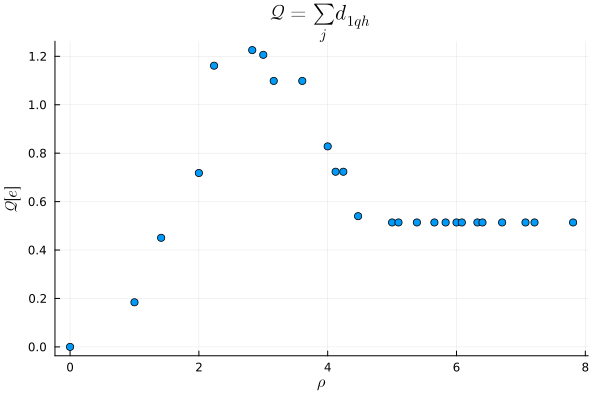

In [273]:
radius_list_1_qh, d_1_qh_list = fractional_charge_rho_square(Nx, Ny, ref_site, avg_density, ref_par_density_1_qh)
scatter(radius_list_1_qh, d_1_qh_list, xlabel=L"\rho", ylabel=L"\mathcal{Q}[e]", title=L"\mathcal{Q} = \sum_j d_{1qh}",legend=:false)

In [238]:
distance_func(Coords, Coords[26], Coords[37])^2

10.000000000000002

In [299]:
# NOT ET: D değişikliği!
# radius_list_1_qh, d_1_qh_list = fractional_charge(Nx, Ny, ref_site)
# scatter(radius_list_1_qh, d_1_qh_list, xlabel=L"\rho", ylabel=L"\mathcal{Q}[e]", title=L"\mathcal{Q} = \sum_j d_{1qh}",legend=:false)

In [69]:
@nbinclude("../Braiding_Phase_Depletion_Script.ipynb")

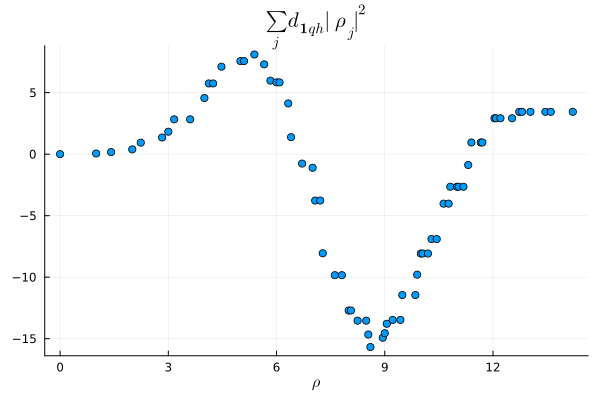

In [300]:
d_1_qh_list_2 = fractional_charge(Nx, Ny, ref_site, dens_1, ref_par_density_1_qh)
scatter(radius_list_1_qh, d_1_qh_list_2, xlabel=L"\rho", title=L"\sum_j d_{\mathbf{1}qh} |\rho_j|^2", legend=:false)

In [168]:
# d_1_qh_site_list = []
# for j in 1:70
#     push!(d_1_qh_site_list, d_k_qh(j))
# end

In [169]:
# d_1_QH_Matrix = ref_par_density .- avg_density

# 2 QH

In [274]:
Nx=8
Ny=8
p=1
q=8
par_num = 3
U = 2
V_Strength = 4

N=Nx*Ny
NPhi = Int( Nx * Ny * (p/q) )
cut_off = NPhi
PN = [i for i in 1:par_num];

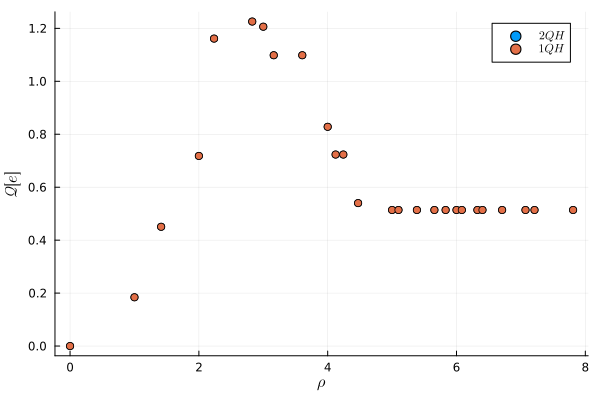

In [271]:
radius_list_2_qh, d_2_qh_list = fractional_charge_rho_square(Nx, Ny, ref_site, avg_density, ref_par_density_2_qh)
scatter(radius_list_2_qh, d_2_qh_list, label=L"2 QH")
scatter!(radius_list_1_qh, d_1_qh_list, label=L"1 QH", xlabel=L"ρ", ylabel=L"\mathcal{Q}[e]")

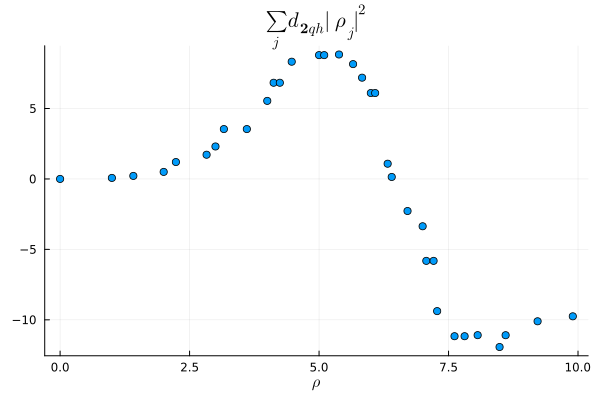

In [373]:
d_2_qh_list_2 = fractional_charge_2(Nx, Ny, ref_site)
scatter(radius_list_2_qh, d_2_qh_list_2, xlabel=L"\rho", title=L"\sum_j d_{ \mathbf{2} qh} |\rho_j|^2", legend=:false)

In [374]:
# d_2_qh_site_list = []
# for j in 1:80
#     push!(d_2_qh_site_list, d_k_qh(j))
# end

In [375]:
# d_2_QH_Matrix = ref_par_density .- avg_density

In [160]:
n = 15
radius_list_1_qh[1:n] == radius_list_2_qh[1:n]

true

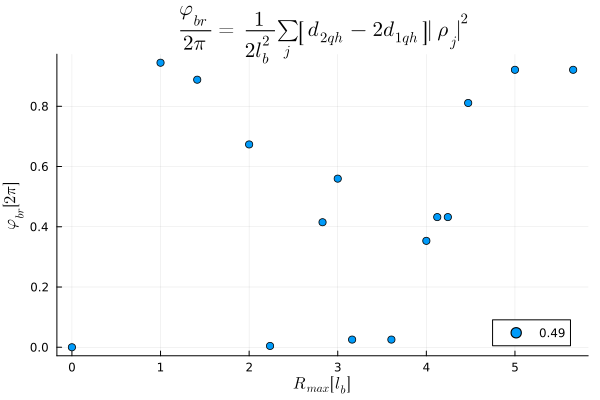

In [161]:
a = 1 # lattica constant
α = p/q # flux per plaquette
l_b = a/sqrt(2*pi*α) # magnetic length
ϕ = (1/2*l_b^2) * (d_2_qh_list[1:n] .- 2*d_1_qh_list[1:n])
ϕ = mod.(ϕ, 1)
av_br = round(sum(ϕ)/length(ϕ),digits=2)
scatter([radius_list_1_qh],[ϕ], xlabel=L"R_{max}[l_b]", ylabel=L"\varphi_{br}[2\pi]" ,title=L"\frac{\varphi_{br}}{2\pi} = \frac{1}{2l_b^2} \sum_j \left[d_{2qh}-2d_{1qh} \right] |\rho_j|^2", label="$(av_br)")

In [51]:
BRAIDING = []
for j in 1:19
    a = 1 # lattica constant
    α = p/q # flux per plaquette
    l_b = a/sqrt(2*pi*α)
    push!(BRAIDING,mod((pi/l_b^2) * (d_2_qh_list[j] .- 2* d_1_qh_list[j]) * radius_list_2_qh[j]^2, 2*pi))
end

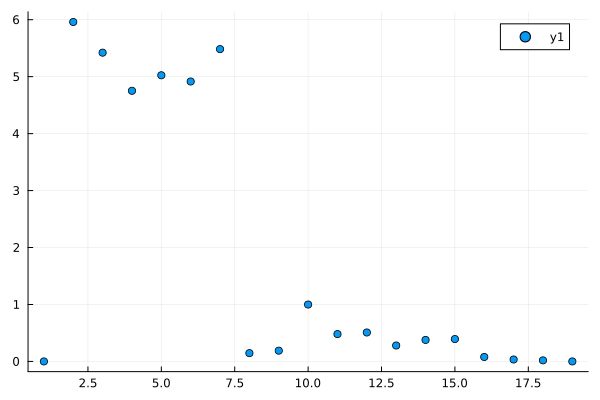

In [52]:
scatter(BRAIDING)

In [43]:
d_2_QH_Matrix'[2:end,:]

7×10 Matrix{Float64}:
 -0.00369808   -0.00226415    0.00438916   …   0.00438916   -0.00226415
 -0.00693168   -0.00300997    0.0119526        0.0119526    -0.00300997
 -0.00753096   -0.00223376    0.0161934        0.0161934    -0.00223376
 -0.00693168   -0.00300997    0.0119526        0.0119526    -0.00300997
 -0.00369808   -0.00226415    0.00438916       0.00438916   -0.00226415
 -0.00114981   -0.000335694   0.000219841  …   0.000219841  -0.000335694
 -0.000278627   0.000876359  -9.16338e-5      -9.16338e-5    0.000876359

In [44]:
d_1_QH_Matrix'

7×10 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.000510599  -0.000685625  -0.000959897  …  -0.000959897  -0.000685625
 -0.0012032    -0.00109324    0.000199024      0.000199024  -0.00109324
 -0.00189359   -0.00122845    0.00266856       0.00266856   -0.00122845
 -0.00207483   -0.00108582    0.0042201        0.0042201    -0.00108582
 -0.00189359   -0.00122845    0.00266856       0.00266856   -0.00122845
 -0.0012032    -0.00109324    0.000199024  …   0.000199024  -0.00109324
 -0.000510599  -0.000685625  -0.000959897     -0.000959897  -0.000685625

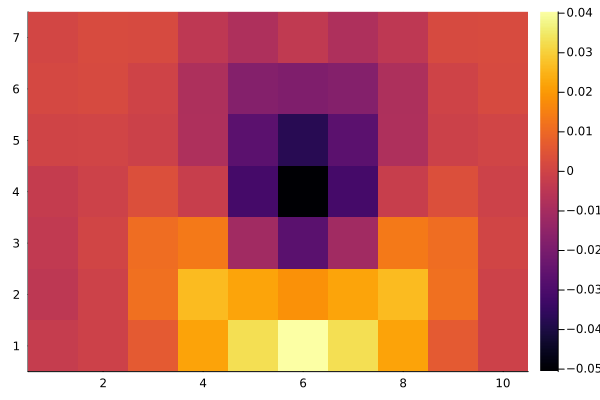

In [46]:
d_mat = (d_2_QH_Matrix'[2:end,:] .- 2*d_1_QH_Matrix') 
# ? * radius_list_2_qh[1:16][j]^2
heatmap(d_mat)

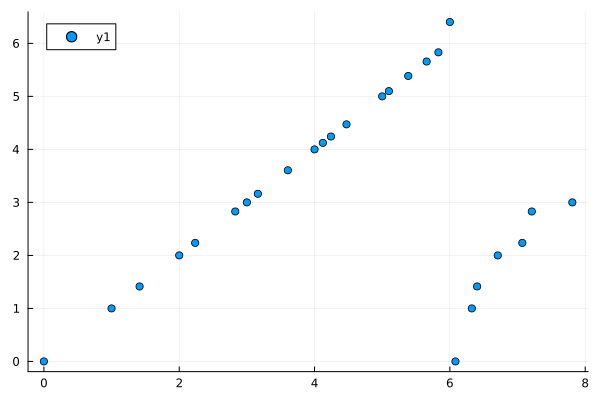

In [44]:
scatter(radius_list_1_qh,radius_list_2_qh)

In [177]:
# radius_list_1_qh[1:16] = radius_list_2_qh[1:16]
ρ_list = radius_list_1_qh[1:16];

In [178]:
d_1_qh_listt = d_1_qh_list[1:16]

16-element Vector{Any}:
 0.049999380622123425
 0.205668790979897
 0.32671336111759686
 0.39416932475783123
 0.49722906270988904
 0.513777939337057
 0.5211913730855289
 0.5332476490182907
 0.5332476490182907
 0.5251584303745862
 0.5202446296907528
 0.5202446296907528
 0.5120320894982568
 0.5072147603105793
 0.5072147603105793
 0.5034275883472364

In [37]:
d_2_qh_listt = d_2_qh_list[1:16]

16-element Vector{Any}:
 0.04999966557158243
 0.24747569125187546
 0.4350966567658118
 0.594378441360567
 0.866901146027672
 0.9408966004913278
 0.9973723670156989
 1.073858170772719
 1.073858170772719
 1.0819463516149823
 1.0547933734968191
 1.0547933734968191
 1.031142054065428
 1.0220850493806282
 1.0220850493806282
 1.0082216903420471

In [45]:
@nbinclude("../Braiding_Phase_Depletion_Script.ipynb")

get_braid_phase2 (generic function with 1 method)

In [44]:
#distance_func(Coords, Coords[ref_site], Coords[j])
radius_list

19-element Vector{Any}:
 0.0
 1.0
 1.4142135623730951
 2.0
 2.23606797749979
 2.8284271247461903
 3.0
 3.1622776601683795
 3.605551275463989
 4.0
 4.123105625617661
 4.242640687119285
 4.47213595499958
 5.0
 5.0990195135927845
 5.385164807134504
 5.656854249492381
 5.830951894845301
 6.4031242374328485

In [46]:
n = 16
φ_br_list = get_braid_phase(radius_list, d_2_qh_list, d_1_qh_list, p, q, n)

36
26
35
36
37
46
25
26
27
35
36
37
45
46
47
16
25
26
27
34
35
36
37
38
45
46
47
56
15
16
17
24
25
26
27
28
34
35
36
37
38
44
45
46
47
48
55
56
57
14
15
16
17
18
24
25
26
27
28
34
35
36
37
38
44
45
46
47
48
54
55
56
57
58
6
14
15
16
17
18
24
25
26
27
28
33
34
35
36
37
38
39
44
45
46
47
48
54
55
56
57
58
66
5
6
7
14
15
16
17
18
23
24
25
26
27
28
29
33
34
35
36
37
38
39
43
44
45
46
47
48
49
54
55
56
57
58
65
66
67
5
6
7
14
15
16
17
18
23
24
25
26
27
28
29
33
34
35
36
37
38
39
43
44
45
46
47
48
49
54
55
56
57
58
65
66
67
4
5
6
7
8
13
14
15
16
17
18
19
23
24
25
26
27
28
29
32
33
34
35
36
37
38
39
40
43
44
45
46
47
48
49
53
54
55
56
57
58
59
64
65
66
67
68
76
4
5
6
7
8
13
14
15
16
17
18
19
22
23
24
25
26
27
28
29
30
32
33
34
35
36
37
38
39
40
42
43
44
45
46
47
48
49
50
53
54
55
56
57
58
59
64
65
66
67
68
75
76
77
4
5
6
7
8
13
14
15
16
17
18
19
22
23
24
25
26
27
28
29
30
32
33
34
35
36
37
38
39
40
42
43
44
45
46
47
48
49
50
53
54
55
56
57
58
59
64
65
66
67
68
75
76
77
3
4
5
6
7
8
9
12
13
14


16-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

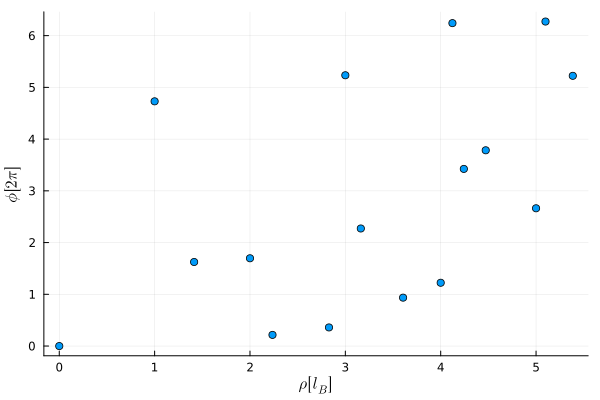

In [181]:
scatter(ρ_list, φ_br_list, xlabel=L"ρ[l_B]", ylabel=L"φ[2π]", legend=:false)

In [151]:
# 1 QH
d_mat_1_qh = ref_par_density .- avg_density'

7×10 Matrix{Float64}:
 -0.000510599  -0.000685625  -0.000959897  …  -0.000959897  -0.000685625
 -0.0012032    -0.00109324    0.000199024      0.000199024  -0.00109324
 -0.00189359   -0.00122845    0.00266856       0.00266856   -0.00122845
 -0.00207483   -0.00108582    0.0042201        0.0042201    -0.00108582
 -0.00189359   -0.00122845    0.00266856       0.00266856   -0.00122845
 -0.0012032    -0.00109324    0.000199024  …   0.000199024  -0.00109324
 -0.000510599  -0.000685625  -0.000959897     -0.000959897  -0.000685625

In [174]:
# 2 QH
d_mat_2_qh = ref_par_density .- avg_density'

8×10 Matrix{Float64}:
 -0.00114981   -0.000335694   0.000219841  …   0.000219841  -0.000335694
 -0.00369808   -0.00226415    0.00438916       0.00438916   -0.00226415
 -0.00693168   -0.00300997    0.0119526        0.0119526    -0.00300997
 -0.00753096   -0.00223376    0.0161934        0.0161934    -0.00223376
 -0.00693168   -0.00300997    0.0119526        0.0119526    -0.00300997
 -0.00369808   -0.00226415    0.00438916   …   0.00438916   -0.00226415
 -0.00114981   -0.000335694   0.000219841      0.000219841  -0.000335694
 -0.000278627   0.000876359  -9.16338e-5      -9.16338e-5    0.000876359

In [194]:
(d_mat_2_qh[2:end,:] - 2*d_mat_1_qh)*ρ_list[3]^2

7×10 Matrix{Float64}:
 -0.00535376   -0.00178579    0.0126179    …   0.0126179    -0.00178579
 -0.00905058   -0.00164699    0.0231091        0.0231091    -0.00164699
 -0.00748758    0.000446272   0.0217126        0.0217126     0.000446272
 -0.00556404   -0.00167666    0.00702482       0.00702482   -0.00167666
  0.000178191   0.00038551   -0.0018959       -0.0018959     0.00038551
  0.00251315    0.00370156   -0.000356413  …  -0.000356413   0.00370156
  0.00148514    0.00449522    0.00365632       0.00365632    0.00449522